<a href="https://colab.research.google.com/github/wenko99/Standalone_DDL/blob/master/Lec04/Lec04_Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

2.0.0-beta1
2.2.4-tf


In [0]:
mnist = tf.keras.datasets.mnist
(data, labels),(test_data, test_labels) = mnist.load_data()

data, test_data = data / 255.0, test_data / 255.0

train_data = data[:50000]
train_labels = labels[:50000]
val_data = data[50000:]
val_labels = labels[50000:]

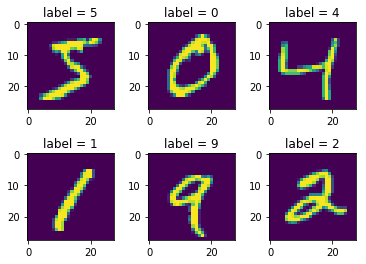

The shape of image is (28, 28)


In [3]:
idx = 0

fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    image = train_data[idx]
    ax.imshow(image)
    ax.set_title("label = {}".format(train_labels[idx]))
    idx += 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

print("The shape of image is {}".format(image.shape))

##Keras : Sequential

케라스에서는 모델의 심층신경망을 효율적으로 관리하기 위해 Sequential이라는 API를 사용할 수 있습니다.

In [0]:
model = tf.keras.Sequential()

#model.add 함수는 이름 그대로 sequence에 layer를 추가해줍니다.

model.add(tf.keras.layers.Dense(64, activation='relu')) # 64개의 유닛을 가진 fully-connected layer를 모델에 추가합니다.

model.add(tf.keras.layers.Dense(64, activation='relu')) # 하나를 더 추가합니다.

model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10개의 출력 유닛을 가진 소프트맥스 층을 추가합니다.

In [3]:
tf.keras.layers.Dense(64, activation='sigmoid') # activation function을 sigmoid로 설정해줍니다.

tf.keras.layers.Dense(64, activation=tf.keras.activations.sigmoid) # 이렇게도 할 수 있습니다.

tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01)) # L1 regularization을 시행합니다.

tf.keras.layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01)) # L2 regularization을 시행합니다.

In [0]:
# model.add로 여러 번 추가해 줄 필요 없이 한번에 만들 수도 있습니다.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# compile을 사용하면 model이 어떤 optimizer(추후에 다룰 예정입니다), loss function, 기준(여기서는 accuracy)을 가지고 평가할지를 정합니다.

model.compile(optimizer=tf.keras.optimizers.SGD(0.01), # 이 optimizer function 옆의 0.01은 learning rate를 뜻합니다.
              loss='sparse_categorical_crossentropy', # 이 loss function은 crossentropy function입니다.
              metrics=['accuracy'])

## Train

model.fit을 사용하면 학습을 진행합니다. epochs는 학습횟수, batch_size는 한 batch에 올라갈 데이터의 크기를 나타냅니다.

In [6]:
hist = model.fit(train_data, train_labels, epochs=50, batch_size=1000, validation_data=(val_data, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 13us/sample - loss: 0.2942 - accuracy: 0.9182 - val_loss: 0.2728 - val_accuracy: 0.9249
Epoch 2/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.2932 - accuracy: 0.9181 - val_loss: 0.2720 - val_accuracy: 0.9252
Epoch 3/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.2922 - accuracy: 0.9185 - val_loss: 0.2712 - val_accuracy: 0.9256
Epoch 4/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.2912 - accuracy: 0.9190 - val_loss: 0.2704 - val_accuracy: 0.9259
Epoch 5/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.2903 - accuracy: 0.9191 - val_loss: 0.2696 - val_accuracy: 0.9260
Epoch 6/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.2893 - accuracy: 0.9198 - val_loss: 0.2688 - val_accuracy: 0.9261
Epoch 7/50
50000/50000 [==============================] 

##Visualization

model.fit은 history를 남기기때문에, 이를 hist = model.fit( ... ) 식으로 받고 아래와 같이 그래프를 그릴 수 있습니다.

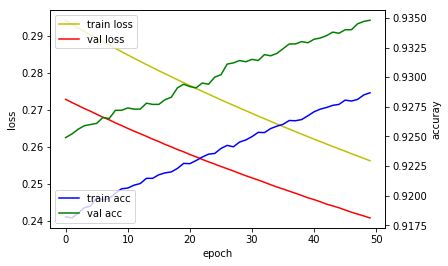

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

##Test

model.evaluate를 통해 모델의 성능 평가를 할 수 있습니다.

In [8]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.2470 - accuracy: 0.9311
테스트 정확도: 0.9311


###Prediction

model.predict를 통해 모델이 data에 대해 예측한 label을 확인할 수 있습니다.

In [0]:
predictions = model.predict(test_data)